# Hands-on-2 
## Task 1
### In this task you will try different sampling methods you saw in the lecture, for this task we will use Iris data you used in previous hands-on
* First a simple random sampling without replacement
* Then random sampling with replacement
* Finally, stratified sampling according to the class of the data

In [1]:
import csv
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd

### Load the same data as before but this time we will use pandas dataframes

In [4]:
def load_iris_data(filename):
    records = []
    with open(filename, 'rt') as csvfile:
        csvreader = csv.reader(csvfile, delimiter=',')
        for row in csvreader:
            if len(row) == 5:  # if we have 4 fields in that line
                records.append({
                   float(row[0]),
                    float(row[1]),
                    float(row[2]),
                    float(row[3]),
                    row[4]
                })
    return records


#Load the Iris data as pandas dataframe
iris_data =  pd.read_csv("../../hands-on-1/data/iris.data", names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "class"])

In [6]:
c = []
for i in range(len(iris_data)):
    if i in range(0, 50):      # Iris Setosa
        c.append("blue")
    elif i in range(50, 100):  # Iris Versicolor
        c.append("green")
    else:                      # Iris Virginica
        c.append("red")
iris_data['color'] = c

### Plot the color coded data as scatter plot

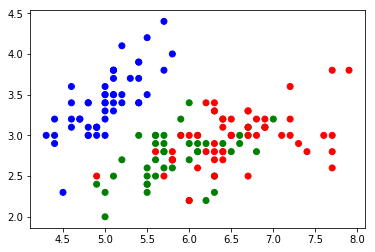

In [7]:
def plotIris(data):
    plt.scatter(data['sepal_length'], data['sepal_width'], c=data['color'])
    plt.show()
plotIris(iris_data)

### Here implement the code for getting a new dataframe iris_data_rand_sample_without_replace which is a random sample without replacement, you may use [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) API form pandas, pick a fraction you like may be like 0.2

In [8]:
iris_data_rand_sample_without_replace = iris_data.sample(frac=0.2, random_state=1, replace=False)

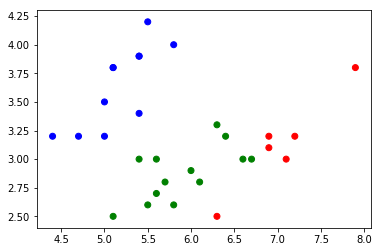

In [9]:
#Plot the sample
plotIris(iris_data_rand_sample_without_replace)

### Next implement the code for getting a new dataframe iris_data_rand_sample_with_replace which is a random sample with replacement, you may use [sample](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sample.html) API form pandas, pick a fraction you like may be like 0.2

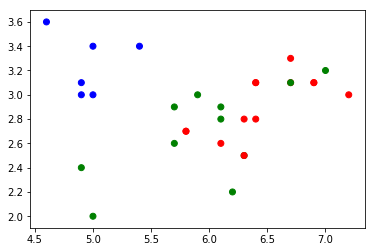

In [10]:
iris_data_rand_sample_with_replace = iris_data.sample(frac=0.2, random_state=1, replace=True)
plotIris(iris_data_rand_sample_with_replace)

### Now implement the code for creating stratified samples based on the class attribute or color attribute You may use the [StratifiedShuffleSplit](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedShuffleSplit.html) API from scikit learn, use n_splits as 5 so that it amounts to 20% splits comparable to 0.2 fraction. Then Plot each split and notice the difference to random samples from above

In [14]:
from sklearn.model_selection import StratifiedShuffleSplit
sss = StratifiedShuffleSplit(n_splits=5, test_size=0., random_state=0)
X = np.array(iris_data[['sepal_length', 'sepal_width']])
y = np.array(iris_data['color'])
sss.get_n_splits(X, y)

5

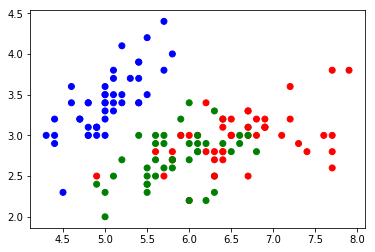

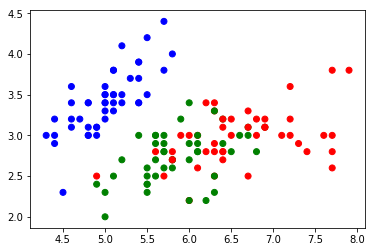

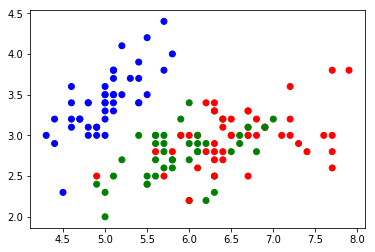

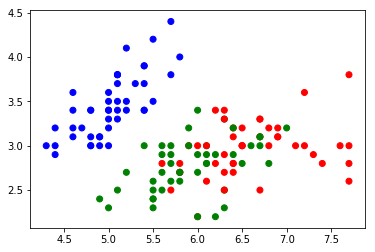

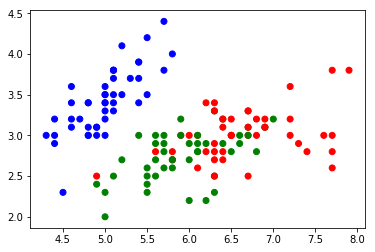

In [15]:
for train_index, test_index in sss.split(X, y):
     X_train, X_test = X[train_index], X[test_index]
     y_train, y_test = y[train_index], y[test_index]
     df_train = pd.DataFrame()  # 1st row as the column names
     df_train['color'] = y_train
     df_train['sepal_length'] = X_train[:,0]
     df_train['sepal_width'] = X_train[:,1]
     plt.scatter(df_train['sepal_length'], df_train['sepal_width'], c=df_train['color'])
     plt.show()